In [1]:
#Import BeautifulSoup and Pandas libraries


from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars News site
url ='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [4]:
# Parse the HTML
html = browser.html
news_soup = soup(html,'html.parser')

In [8]:
weather = news_soup.find_all('table', class_= 'table')
weather

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

In [12]:
mars_df = pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [15]:
df = mars_df[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
# the data types of all the DataFrame columns
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [18]:
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [19]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [23]:
# How many months exist on Mars?
mars_months = df['month'].nunique()
print(mars_months, f'months')

12 months


In [29]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_Days = df['sol'].nunique()
martian_Days

1867

In [41]:
#  What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

month_df = df.groupby(['month']).mean()
month_df.sort_values(['min_temp'])



,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
6,735.306122,750.829932,164.897959,-75.299320,745.054422
12,931.602410,990.951807,344.692771,-74.451807,842.156627
7,714.549296,715.105634,194.894366,-72.281690,795.105634
11,874.246377,947.224638,314.536232,-71.985507,857.014493


In [76]:
month_temp_df = month_df[["min_temp"]]
month_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [82]:
# the coldest and the warmest months
min_temp_avg = month_temp_df.min()
min_temp_avg


min_temp   -83.307292
dtype: float64

In [83]:
#warmest month 
max_temp_avg = month_temp_df.max()
max_temp_avg

min_temp   -68.382979
dtype: float64

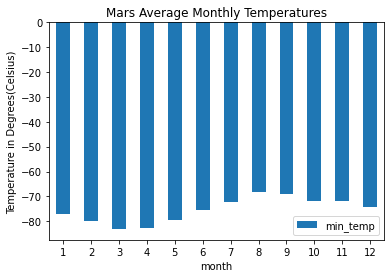

In [81]:
import matplotlib.pyplot as plt

month_temp_df.plot(kind= 'bar')
plt.title("Mars Average Monthly Temperatures")
plt.ylabel("Temperature in Degrees(Celsius)")
plt.xticks(rotation = 360)
plt.savefig("Resources/mars_monthly_temp.png")

In [44]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

atm_df = df.groupby(['month']).mean()
atm_df.sort_values(['pressure'])


,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.299320,745.054422
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
7,714.549296,715.105634,194.894366,-72.281690,795.105634
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
12,931.602410,990.951807,344.692771,-74.451807,842.156627
11,874.246377,947.224638,314.536232,-71.985507,857.014493
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
8,718.078014,795.333333,224.347518,-68.382979,873.829787
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917


In [84]:
month_pressure_df = month_df[["pressure"]]
month_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [85]:
#Which month have the lowest  atmospheric pressure on Mars?
min_avg_pressure= month_pressure_df['pressure'].min()
lowest_pressure_month=month_pressure_df.loc[month_pressure_df['pressure']==min_avg_pressure]
lowest_pressure_month

,pressure
month,
6,745.054422


In [86]:
#Which month have the highest  atmospheric pressure on Mars?
max_avg_pressure= month_pressure_df['pressure'].max()
highest_pressure_month=month_pressure_df.loc[month_pressure_df['pressure']==max_avg_pressure]
highest_pressure_month

,pressure
month,
9,913.30597


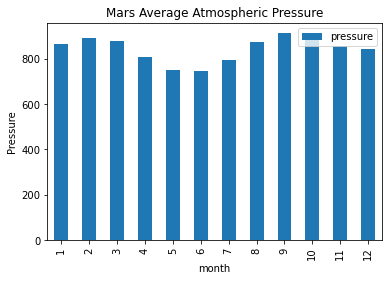

In [88]:
month_pressure_df.plot(kind= 'bar')
plt.title("Mars Average Atmospheric Pressure")
plt.ylabel("Pressure")

plt.savefig("Resources/monthly_pressure.png")

In [96]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many
#days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

from datetime import date

date_df = df.sort_values(['terrestrial_date'])
date_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [98]:
start_date = date_df.loc[date_df['ls']==0]
start_date

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [101]:
# About how many terrestrial (Earth) days exist in a Martian year?
date_format = "%Y/%M/%D"
s = date(2015,6,19)
e = date(2017,5,6)
delta = e - s
print(delta.days)

687


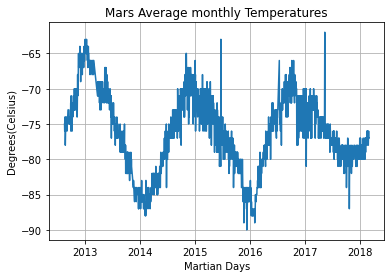

In [100]:
plt.plot(date_df['terrestrial_date'],date_df['min_temp'])
plt.title("Mars Average monthly Temperatures")
plt.xlabel("Martian Days")
plt.ylabel("Degrees(Celsius)")
plt.grid()

plt.savefig("Resources/yearly_temp.png")

In [ ]:
# Save DataFrame to a CSV file
df.to_csv('Mars_df')